# Analysis of parking violations in New York City-2


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, date, time
import datetime
from IPython.display import Image
from sqlalchemy import create_engine
import sqlite3
import csv
import time
import matplotlib.patches as mpatches
import statsmodels.api as sm # import statsmodels 

C:\Users\VT\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%matplotlib inline

# Parking tickets in New York City

##  About this Dataset

                * Data Last Updated       August 9, 2017
                * Metadata Last Updated:  December 21, 2017
                * Date Created:           August 3, 2017

                * Data Provided by        Department of Finance (DOF)
                * Dataset Owner           NYC OpenData
    
                * Rows                    10.8M
                * Columns                 43


### Columns in this Dataset  
|**Column Name**             |**Type** |
|:----------------------:|:-------:|
|Summons Number          |Number   |
|Plate ID                |Plain Text|
|Registration State|Plain Text|
|Violation Code|Number|
|...............|..........|
|Street Name|Plain Text|
|Intersecting Street|Plain Text|
|...............|..........|
|Hydrant Violation|Plain Text|
|Double Parking Violation|Plain Text|



## website for data:  
https://data.cityofnewyork.us/City-Government/Parking-Violations-Issued-Fiscal-Year-2017/2bnn-yakx


In [3]:
connex = sqlite3.connect("Parking2017-1.db")  # Opens file if exists, else creates file
cur = connex.cursor()  # This object lets us actually send messages to our DB and receive results

In [4]:
start = time.time()
sql = "SELECT RegistrationState, VehicleBodyType,StreetName,VehicleYear,IssueDate, ViolationCounty, ViolationDescription FROM 'table' ;"
df = pd.read_sql_query(sql, connex)

print(df.head(10))
print(df.info())

end = time.time()
elapsed = end - start
print(elapsed)

  RegistrationState VehicleBodyType            StreetName  VehicleYear  \
0                NY            SUBN  ALLERTON AVE (W/B) @         2001   
1                NY            SUBN  ALLERTON AVE (W/B) @         2001   
2                NY            SUBN  SB WEBSTER AVE @ E 1         2004   
3                NY            REFG               7th Ave         2007   
4                NY            DELV               6th Ave         2007   
5                NY            SUBN   NORTHERN BLVD (E/B)         2012   
6                NJ             SDN              KINGSTON            0   
7                MA              UT  EB E GUN HILL RD @ B         2001   
8                NY            SUBN  NB BAISLEY BLVD @ 15         2016   
9                VA              4D  SB WEBSTER AVE @ E 2         2008   

    IssueDate ViolationCounty            ViolationDescription  
0  07/10/2016              BX    FAILURE TO STOP AT RED LIGHT  
1  07/08/2016              BX    FAILURE TO STOP AT RED L

In [5]:
df['ViolationCounty'].unique()

array(['BX', 'NY', 'QN', 'K', 'Q', 'R', 'BK', 'ST', 'MN', None, 'BRONX',
       'QNS', 'KINGS'], dtype=object)

In [6]:
df['ViolationCounty'].isnull().sum()

39547

In [7]:
df['RegistrationState'].unique() 

array(['NY', 'NJ', 'MA', 'VA', 'AZ', 'FL', 'AL', 'SC', 'MN', 'MD', 'PA',
       'IN', 'CA', 'WY', 'OR', 'CT', 'TX', 'ON', 'DE', '99', 'NC', 'ME',
       'IA', 'GA', 'TN', 'RI', 'IL', 'MI', 'VT', 'OH', 'NE', 'SD', 'NH',
       'UT', 'WI', 'KY', 'NM', 'QB', 'WA', 'OK', 'CO', 'MO', 'ID', 'AR',
       'KS', 'MS', 'MT', 'WV', 'LA', 'HI', 'DC', 'DP', 'AB', 'GV', 'NV',
       'NS', 'AK', 'ND', 'MB', 'BC', 'NB', 'PR', 'NT', 'FO', 'PE', 'SK',
       'MX'], dtype=object)

+ Registration states shown above seems coming from US and Canada. For states information for USA and Canada, here is the list: https://www.ups.com/worldshiphelp/WS16/ENU/AppHelp/SHIPUPS.htm#Codes/State_Province_Codes.htm  +

### Cleanup the data by removal of NaN or meaningless values
In the Registration State column,there are '99' and 'DP' that are not identified places and needed to be removed.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10803028 entries, 0 to 10803027
Data columns (total 7 columns):
RegistrationState       object
VehicleBodyType         object
StreetName              object
VehicleYear             int64
IssueDate               object
ViolationCounty         object
ViolationDescription    object
dtypes: int64(1), object(6)
memory usage: 576.9+ MB


In [9]:
new = df[df['StreetName'].notnull()]
new = new[new['ViolationCounty'].notnull()]
new = new[new['VehicleYear'].notnull()]
new = new[new['RegistrationState'].notnull()]
new = new[new['RegistrationState']!='99']
new = new[new['RegistrationState']!='DP'] 
new = new[new['VehicleYear']!=0] 
#remove 'DP' since cannot find what DP stands for
#new = new[new['SummonsNumber'].notnull()]
print(new.info())
new['ViolationCounty'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8440953 entries, 0 to 10803027
Data columns (total 7 columns):
RegistrationState       object
VehicleBodyType         object
StreetName              object
VehicleYear             int64
IssueDate               object
ViolationCounty         object
ViolationDescription    object
dtypes: int64(1), object(6)
memory usage: 515.2+ MB
None


array(['BX', 'NY', 'QN', 'Q', 'K', 'R', 'BK', 'ST', 'MN', 'BRONX', 'QNS'],
      dtype=object)

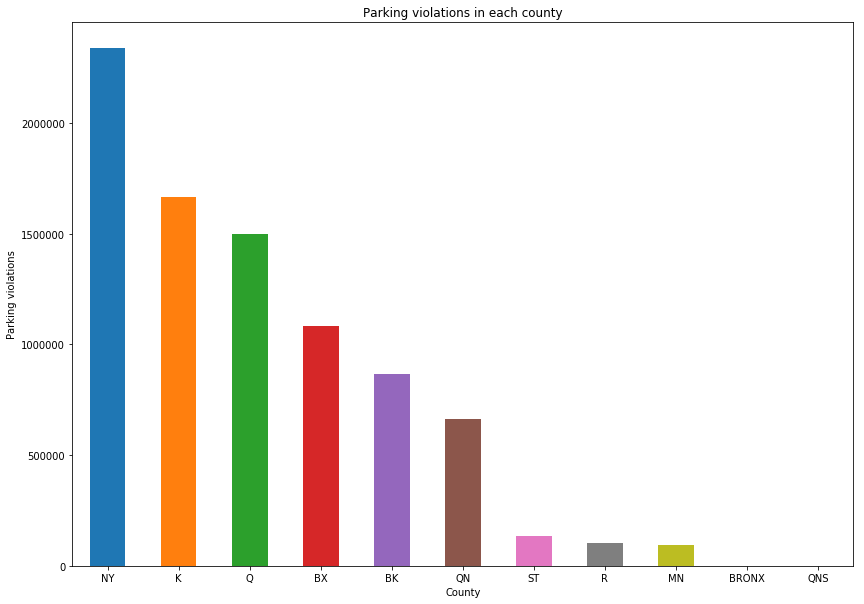

In [10]:
new['ViolationCounty'].value_counts().plot(kind='bar',figsize=(14, 10))
plt.title('Parking violations in each county')
plt.xlabel('County')
plt.xticks(rotation = 0)
plt.ylabel('Parking violations')
plt.savefig('Parking_ticket_counties')

### It can be seen that NY county is the most one issued tickets followed by K, Q, BX , BK , QN and other counties. We want to see if there is linear relationship between these counties and the issued ticket. In order to do that, we use name of other counties since they take very small fraction of all tickets issued.

In [11]:
new['ViolationDescription'].unique()

array(['FAILURE TO STOP AT RED LIGHT', 'BUS LANE VIOLATION',
       '47-Double PKG-Midtown', '69-Failure to Disp Muni Recpt',
       'PHTO SCHOOL ZN SPEED VIOLATION', None, '19-No Stand (bus stop)',
       '71-Insp. Sticker Missing (NYS', '64-No STD Ex Con/DPL, D/S Dec',
       '38-Failure to Display Muni Rec', '71A-Insp Sticker Expired (NYS)',
       '14-No Standing', '75-No Match-Plate/Reg. Sticker',
       '10-No Stopping', '21-No Parking (street clean)', '50-Crosswalk',
       '48-Bike Lane', '51-Sidewalk', '09-Blocking the Box',
       '37-Expired Muni Meter', '16A-No Std (Com Veh) Non-COM',
       '20A-No Parking (Non-COM)', '46A-Double Parking (Non-COM)',
       '24-No Parking (exc auth veh)', '31-No Stand (Com. Mtr. Zone)',
       '40-Fire Hydrant', '13-No Stand (taxi stand)',
       '16-No Std (Com Veh) Com Plate', '46B-Double Parking (Com-100Ft)',
       '70A-Reg. Sticker Expired (NYS)', '42-Exp. Muni-Mtr (Com. Mtr. Z)',
       '74A-Improperly Displayed Plate', '82-Unaltered 

In [12]:
new = new[new['ViolationDescription'].notnull()]
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713648 entries, 0 to 10797400
Data columns (total 7 columns):
RegistrationState       object
VehicleBodyType         object
StreetName              object
VehicleYear             int64
IssueDate               object
ViolationCounty         object
ViolationDescription    object
dtypes: int64(1), object(6)
memory usage: 470.8+ MB


In [13]:
new['VehicleYear'].unique()

array([2001, 2004, 2007, 2012, 2016, 2008, 2013, 2009, 1989, 2014, 1993,
       2011, 2015, 2010, 2005, 2006, 2003, 2002, 2017, 1991, 1988, 1996,
       1997, 1998, 1999, 1995, 1992, 1990, 1994, 1975, 1985, 1987, 2018,
       1986, 1973, 1981, 1979, 1983, 1978, 2068, 2059, 1974, 2065, 2066,
       1970, 1972, 1984, 2062, 1982, 1980, 2069, 1977, 2061, 2067, 2054,
       1971, 2024, 2063, 2064, 2046, 2039, 1976, 2019, 2052, 2053, 2055,
       2038, 2043, 2049, 2057, 2033, 2060, 2040, 2034, 2026, 2021, 2030,
       2056, 2058, 2047, 2041, 2051, 2025, 2050, 2022, 2035, 2045, 2023,
       2048, 2031, 2036, 2037, 2027, 2032, 2028, 2020], dtype=int64)

In [14]:
new['Group'] = np.nan
sticker = (new['ViolationDescription'].str.contains('Sticker', regex=False, case=False, na=False)) | (new['ViolationDescription'].str.contains('Stkr', regex=False, case=False, na=False))
new.loc[sticker,'Group']=1  # assign sticker violation as group 1
#print(new[sticker])
bus =  new['ViolationDescription'].str.contains('bus' , regex=False, case=False, na=False)
new.loc[bus,'Group']=2  # assign bus violation as group 2
#print(new[bus]) 
parking = (new['ViolationDescription'].str.contains('parking' , regex=False, case=False, na=False)) | (new['ViolationDescription'].str.contains('pkg' , regex=False, case=False, na=False))
new.loc[parking,'Group']=3  # assign parking violation as group 3
#print(new[parking])
other = ~(bus | parking | sticker)
new.loc[other,'Group']=4  # assign other violation as group 4
#print(new[other])
new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713648 entries, 0 to 10797400
Data columns (total 8 columns):
RegistrationState       object
VehicleBodyType         object
StreetName              object
VehicleYear             int64
IssueDate               object
ViolationCounty         object
ViolationDescription    object
Group                   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 529.7+ MB


In [15]:
new['Group'].unique()

array([4., 2., 3., 1.])

In [16]:
data_dmy = pd.get_dummies(new, columns =['ViolationCounty'],drop_first=True)
data_vars = data_dmy.columns.values.tolist()
removal_vars = ['StreetName','VehicleYear','IssueDate','ViolationDescription','VehicleBodyType','RegistrationState']
keep = [i for i in data_vars if i not in removal_vars]
data_dmy = data_dmy[keep]

y = ['Group']
X = [i for i in keep if i not in y]
print(X)
y

['ViolationCounty_BX', 'ViolationCounty_K', 'ViolationCounty_MN', 'ViolationCounty_NY', 'ViolationCounty_Q', 'ViolationCounty_QN', 'ViolationCounty_R', 'ViolationCounty_ST']


['Group']

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# Create one-vs-rest logistic regression object
clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')
# Standarize features
#scaler = StandardScaler()
#X_std = scaler.fit_transform(data_dmy[X])

In [19]:
from sklearn.model_selection import train_test_split
#start = time.time()

X_train, X_test, y_train, y_test = train_test_split(data_dmy[X],data_dmy[y], test_size=0.4, random_state=0)
# Train model
#model = clf.fit(X_train, y_train.values.ravel())
#model.predict(X_test)

#print(model.summary2())
#end = time.time()
#elapsed = end - start
#print(elapsed)

In [20]:
y_train

,Group
5472777,4.0
2116836,4.0
8991768,3.0
6558940,1.0
3227260,1.0
3789902,2.0
8874597,3.0
5201606,3.0
9537439,4.0
8012332,3.0


In [21]:
X_train

,ViolationCounty_BX,ViolationCounty_K,ViolationCounty_MN,ViolationCounty_NY,ViolationCounty_Q,ViolationCounty_QN,ViolationCounty_R,ViolationCounty_ST
5472777,0,0,0,0,1,0,0,0
2116836,0,0,0,0,0,0,0,0
8991768,0,0,0,1,0,0,0,0
6558940,0,0,0,0,1,0,0,0
3227260,0,1,0,0,0,0,0,0
3789902,1,0,0,0,0,0,0,0
8874597,0,1,0,0,0,0,0,0
5201606,0,0,0,1,0,0,0,0
9537439,1,0,0,0,0,0,0,0
8012332,0,0,0,0,1,0,0,0


In [22]:
import statsmodels.api as sm # import statsmodels 

start = time.time()
X_train = sm.add_constant(X_train, prepend = False)
model = sm.MNLogit(y_train, X_train).fit(method='bfgs',maxiter=200) ## sm.MNLogit(output, input)

# Print out the statistics
print(model.summary2())



end = time.time()
elapsed = end - start
print(elapsed)

Optimization terminated successfully.
         Current function value: 0.844061
         Iterations: 180
         Function evaluations: 181
         Gradient evaluations: 181


ValueError: operands could not be broadcast together with shapes (9,) (9,3) 

In [ ]:
rank_st = new['RegistrationState'].value_counts()
rank_st.sort_values(ascending=False)
top10 = rank_st[0:10]
fig = plt.figure(figsize=(14, 10))

fig.suptitle('10 states with most violations in 2017', fontsize=18)
plt.xlabel('States', fontsize=18)
top10.plot(kind="bar",rot=0)

From the figure above, it is shown that most tickets issued are cars from local New York. The second most is from New Jersey which is 3 times more than the third state-Pennsylvania. This is very insightful for police in New York City to take measures to reduce the traffic inflow from New Jersey such as imposing higher fees for toll roads leading to New York City.  

In [ ]:
Image(filename="C:\\Users\\VT\\Datacamp\\10_most_ states.jpg")

The map shows that the Florida is pretty far from New York City with the 4th most parking tickets issued, which raises the question: **Why Does Florida people love visit New York city than any other long distance states?** 

In [ ]:
State_rank = pd.DataFrame({'Code':rank_st.index, 'Violations':rank_st.values},dtype='float64')
Places = pd.read_csv('C:\\Users\VT\Datacamp\\USCA_states.csv',header=0)  #names=['Place','Code','Distance']

State_rank.sort_values('Code',inplace=True, ascending=True)
State_rank.set_index('Code', inplace=True)
Places.set_index('Code', inplace=True)
 
Places['Violations']=State_rank[State_rank.index == Places.index]['Violations'].astype('float64')

In [ ]:
print(Places)
fig = plt.figure(figsize=(14, 10))
plt.scatter(Places['Distance'], Places['Violations'],color='Red')
plt.xlabel('Distance(miles)', fontsize=18)
plt.ylabel('Violations', fontsize=18)
#plt.xlim(0.00001,0.015)
plt.ylim(0.,1.0e7)

Above figure tells us that distance is proximately inversely proportional to the number of violations(parking tickests issued). Therefore we are to plot violations vs 1/(distance), in order to implement this, the new york needs to be removed froom dataset since the distance is zero. 

In [ ]:
import statsmodels.api as sm # import statsmodels 
fig = plt.figure(figsize=(14, 10))
Places = Places[Places.index!='NY']
plt.scatter(1/Places['Distance'], Places['Violations'])
plt.xlim(0.00001,0.015)
plt.ylim(0.,1.0e6)
plt.xlabel('1/Distance(1/miles)', fontsize=18)
plt.ylabel('Violations', fontsize=18)


Places['inv_dis']=1.0/Places['Distance']
X = Places['inv_dis'] ## X usually means our input variables (or independent variables)
y = Places['Violations'] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
print(model.summary())

X_plot = np.linspace(0.0,0.015,100)
plt.plot(X_plot, X_plot*model.params[1] + model.params[0], color='red')

plt.show() 

Figure showes that a linear trend.Therefore it is feasible to do linear regression. 

R-squared: 0.559 meaning 55.9% variance was explained by this linear model. 

In [ ]:

new['month'] = pd.to_datetime(new['IssueDate'],format='%m/%d/%Y').dt.month
top1=new.loc[new['RegistrationState']=='NY']
#print(new.head())
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
num_NY=top1.groupby(['month'])['month'].count()

top_other=new.loc[new['RegistrationState']!='NY']
num_other=top_other.groupby(['month'])['month'].count()

plt.figure(figsize=(14,10))
plt.bar(num_NY.index , num_NY, color = 'b', width = 0.5) # plotting the graph
plt.bar(num_other.index , num_other, color = 'r', width = 0.5) # plotting the graph
plt.xticks(num_NY.index, labels, rotation=0) #providing xticks to the graph

blue_patch=mpatches.Patch(color='b',label='New York') 
red_patch=mpatches.Patch(color='r',label='Other places')
plt.legend(handles=[blue_patch,red_patch]) #providing the labels



Above figure indicates that tickets for 12 months have similar pattern for New York city as the other places, i.e., June is the highest month and July is least month. For each month, tickets for New York city drivers are more than those for other cities combined. 

In [ ]:
df = pd.DataFrame({
              'month':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
              'New York':num_NY.values,
              'Other Places':num_other.values}
             )
df = df.set_index(['month'])
#print(df)
ax = df.plot(kind='bar', title ="Tickets issued each month for New York vs. other places", figsize=(14, 10), legend=True,rot=0, fontsize=14)
ax.set_xlabel("Month", fontsize=14,rotation=0)
ax.set_ylabel("number of tickets", fontsize=14,rotation=90)
plt.show()

In [ ]:
FL=new.loc[new['RegistrationState']=='FL']
#print(new.head())
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
num_FL=FL.groupby(['month'])['month'].count()
df = pd.DataFrame({
              'month':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
              'Florida':num_FL.values}
             )
df = df.set_index(['month'])
#print(df)
ax = df.plot(kind='bar', title ="Tickets issued each month for Florida", figsize=(14, 10), legend=True,rot=0, fontsize=14)
ax.set_xlabel("Month", fontsize=14,rotation=0)
ax.set_ylabel("number of tickets", fontsize=14,rotation=90)
plt.show()

In [ ]:
rank_street = new['StreetName'].value_counts()
rank_street.sort_values(ascending=False)
#top10 = rank_street[0:10]
fig = plt.figure(figsize=(10, 10))
rank_street[0:10].plot(kind="pie",autopct='%1.1f%%')
#print(rank_street[0:10])

In [ ]:
Image(filename="C:/Users/VT/Datacamp/10_most_ streets.jpg")

**This is surprising to realize that the most parking tickets were issued on the Manhattan island**, the most popular borough in New York City.  According to Wikipedia---"Among the world’s major commercial, financial and cultural centers, it’s the heart of “the Big Apple.” Its iconic sites include skyscrapers such as the Empire State Building, neon-lit Times Square and the theaters of Broadway." Most parking violations happened on the Broadway. 